In [232]:
#libs
import pandas as pd 
import os 
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats

In [233]:
#dataframe
df = pd.read_pickle('mastertable.pkl')
#criando um dataframe com dados diários do dolar
#usd = currency.get(['USD'], start='2019-01-01', end='2022-07-14')
#criando dataframe com dados mensais de ipca 
#ipca = sgs.get({'IPCA':433}, start='2019-01-01', end='2022-07-01')
#adicionando uma coluna do acumulado do ipca
#ipca['ipca_acumulado'] = ipca['IPCA'].cumsum()
#vol ipca 
#ipca['vol_ipca']=(ipca['IPCA']-ipca['IPCA'].shift(1))/ipca['IPCA'].shift(1)

In [234]:
pd.set_option("display.max_columns", 999)
pd.options.display.float_format = '{:.2f}'.format
df.head(2)

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,0,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOH0,HOH0,1.00,1.92,3.76,6595948.80,24798129.11,7,2019,20197,0.32,4.01,6.50,0.01,0.01,6.18,1,310751555.39,82655483.40,0.33
2019-07-24,1,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOX0,HOX0,1.00,1.86,3.76,6418238.40,24130009.09,7,2019,20197,0.43,4.44,6.50,0.88,0.89,6.07,1,334803876.10,89053057.80,0.31


In [241]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

# Date range
start = '2019-01-01'
end = '2022-08-30'

In [236]:
import datetime

In [112]:
# Tickers of commodities
assets = ['GC=F','MGC=F','SI=F','SIL=F','PL=F','HG=F','PA=F','CL=F','HO=F','NG=F','RB=F','BZ=F','ZC=F','ZO=F','KE=F','ZR=F','ZM=F','ZL=F','ZS=F','GF=F','HE=F','LE=F','CC=F','KC=F','CT=F','LBS=F','OJ=F','SB=F'
]
assets.sort()

In [113]:
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  28 of 28 completed


In [114]:
data.head(2)

,BZ=F,CC=F,CL=F,CT=F,GC=F,GF=F,HE=F,HG=F,HO=F,KC=F,KE=F,LBS=F,LE=F,MGC=F,NG=F,OJ=F,PA=F,PL=F,RB=F,SB=F,SI=F,SIL=F,ZC=F,ZL=F,ZM=F,ZO=F,ZR=F,ZS=F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,5491.0000%,239400.0000%,4654.0001%,7083.9996%,128100.0000%,14794.9997%,6170.0001%,262.5000%,170.0600%,9950.0000%,49250.0000%,32900.0000%,12352.5002%,128409.9976%,295.8000%,NaN,125550.0000%,79909.9976%,132.5600%,1193.0000%,1554.2000%,1554.2000%,37575.0000%,2790.0000%,31100.0000%,27825.0000%,100850.0000%,89475.0000%
2019-01-03,5595.0001%,240000.0000%,4709.0000%,7083.0002%,129180.0049%,14652.4994%,6215.0002%,257.0500%,174.2000%,10215.0002%,50350.0000%,32629.9988%,12322.4998%,129480.0049%,294.5000%,NaN,125700.0000%,79450.0000%,134.9500%,1169.0000%,1570.6000%,1570.6000%,37975.0000%,2818.0000%,31270.0012%,27850.0000%,101700.0000%,90025.0000%


In [23]:
df['anomes']=df['anomes'].astype(int)

In [24]:
df.dtypes

anomes                    int32
mercadoria               object
tipo                     object
bolsa                    object
unidade_negociacao       object
moeda                    object
quantidade_negociada      int64
comprador_vendedor       object
cod_ric                  object
cod_ticker               object
fator_conversao         float64
valor_cotacao           float64
usd                     float64
notional_usd            float64
notional_brl            float64
mes                      object
ano                      object
ipca                    float64
ipca_acumulado          float64
selic                   float64
igpm                    float64
igpm_acumulado          float64
juros_real              float64
contratos                 int64
notionalbrl_norm        float64
notional_brl_ipca       float64
notional_usd_ipca       float64
dtype: object

In [136]:
tes=df
tes = tes[(tes['anomes']>=20205)].copy() #& (tes['anomes']<=20225)].copy()
tes = tes[tes['mercadoria']=='SOJA'].copy()
tes = tes[tes['fator_conversao']>=1].copy()
tes.describe()

,anomes,quantidade_negociada,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notionalbrl_norm,notional_brl_ipca,notional_usd_ipca
count,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00,3111.00
mean,83753.60,6421.49,1.00,361.46,5.37,2290231.78,12237182.52,0.81,16.44,4.98,1.42,36.20,4.17,1.00,0.03,970046636.89,181681938.98
std,86714.94,5095.83,0.00,41.65,0.26,1786214.62,9512788.24,0.40,5.34,2.68,1.28,12.26,2.57,0.00,0.23,729731091.66,138828077.51
min,20205.00,75.00,1.00,280.00,4.00,25027.50,143470.14,-0.38,6.77,2.00,-0.64,5.02,0.65,1.00,-0.26,7641672.92,1333043.68
25%,20215.00,3000.00,1.00,333.10,5.23,1042712.40,5730898.90,0.54,11.01,2.75,0.64,27.25,2.01,1.00,-0.13,517021899.56,94406103.16
50%,20221.00,5511.00,1.00,361.70,5.44,2014270.50,10727603.28,0.86,17.03,4.25,1.51,43.25,3.85,1.00,-0.01,760834991.83,143601852.00
75%,202011.00,11000.00,1.00,390.90,5.53,3218591.85,17054246.13,1.16,20.31,6.25,2.53,43.91,5.00,1.00,0.14,1274178137.36,235466689.44
max,202112.00,37000.00,1.00,521.90,5.90,14208000.00,80262412.80,1.62,26.22,11.75,4.34,51.60,10.69,1.00,1.66,4275029565.98,756762947.37


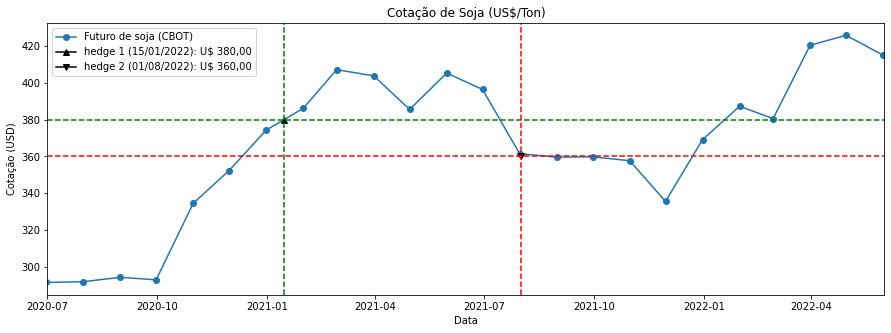

In [188]:
tes = tes.groupby(by=['data_referencia']).agg(
        {'contratos':'count','quantidade_negociada':'sum',
        'notional_brl':'sum','notional_usd':'sum', 'notional_brl_ipca':'sum',
        'notional_usd_ipca':'sum','valor_cotacao':'mean'}).copy()
    #mer.set_index('data_referencia',inplace=True)
tes = tes.resample('1M').agg(
        {'contratos':'count','quantidade_negociada':'sum',
        'notional_brl':'sum','notional_usd':'sum', 'notional_brl_ipca':'sum',
        'notional_usd_ipca':'sum','valor_cotacao':'mean'}).copy()
plt.figure(figsize=(15,5))
x = tes.index
y = tes['valor_cotacao']
#date = [datatetime.date(2020,5,20),datatetime.date(2020,5,20)]
plt.xlabel('Data')
plt.legend('Mercado x Cliente')
plt.ylabel('Cotação (USD)')
plt.title('Cotação de Soja (US$/Ton)')
plt.xlim([datetime.date(2020,7,1),datetime.date(2022,6,1)])
plt.plot(x,y, marker='o')
plt.plot(datetime.date(2021,1,15), 380, marker='^', color="black")
plt.plot(datetime.date(2021,8,1), 360, marker='v', color="black")
#ponto de hedge
plt.axhline(y = 380, color = 'g', linestyle = '--')
plt.axvline(x = datetime.date(2021,1,15), color = 'g', linestyle = '--')

#ponto de colheita
plt.axhline(y = 360, color = 'r', linestyle = '--')
plt.axvline(x = datetime.date(2021,8,1), color = 'r', linestyle = '--')

plt.legend(['Futuro de soja (CBOT)','hedge 1 (15/01/2022): U$ 380,00','hedge 2 (01/08/2022): U$ 360,00']);

In [88]:
def mercadoria(comm,intervalo,anomes1,anomes2,variavel,clientes,cli):

    mer = df[(df['anomes']>=int(anomes1)) & (df['anomes']<=int(anomes2))].copy()
    mer = mer[mer['mercadoria']==comm].copy()
    if clientes == 'sim':
        mer = mer[mer['comprador_vendedor']==cli].copy()
    else: 
        mer = mer
    #mer.dropna(inplace=True)
    mer = mer.groupby(
    by=['data_referencia']).agg(
        {'contratos':'count','quantidade_negociada':'sum',
        'notional_brl':'sum','notional_usd':'sum', 'notional_brl_ipca':'sum',
        'notional_usd_ipca':'sum','valor_cotacao':'mean'}).copy()
    #mer.set_index('data_referencia',inplace=True)
    mer = mer.resample(intervalo).agg(
        {'contratos':'count','quantidade_negociada':'sum',
        'notional_brl':'sum','notional_usd':'sum', 'notional_brl_ipca':'sum',
        'notional_usd_ipca':'sum','valor_cotacao':'mean'}).copy()
    plt.figure(figsize=(15,5))
    x = mer.index
    y = mer[variavel]
    plt.xlabel('Data')
    plt.legend(cli)
    plt.ylabel(variavel+'_'+comm)
    plt.title(variavel+'_'+comm)
    plt.plot(x,y, marker='o')
    #plt.axhline(y = 500, color = 'r', linestyle = '-');

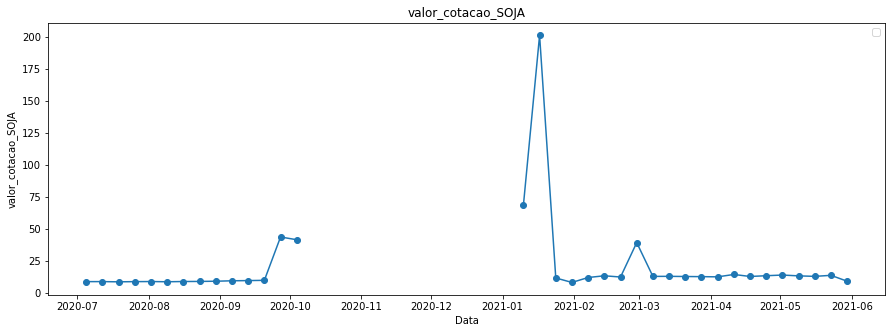

In [89]:
#opç variáveis: contratos, notional_ipca, quantidade_negociada
#opç clientes: Mercado x Mercado, Mercado x Cliente, Cliente x Mercado, Cliente x Cliente
mercadoria('SOJA','1W','20207','20215','valor_cotacao','sim','Mercado x Cliente') #opç variáveis: contratos, notional_ipca, quantidade_negociada

In [117]:
def prep(comm,mes,clientes,cli):
    mer = df[df['mercadoria']==comm].copy()
    if clientes == 'sim':
        mer = df[df['comprador_vendedor']==cli].copy()
    else: 
        mer = mer
    mer = mer.groupby(
    by=['data_referencia']).agg(
        {'valor_cotacao':'mean','usd':'mean'}).copy()
    #mer.set_index('data_referencia',inplace=True)
    mer = mer.resample(mes).mean().copy()
    return mer

In [121]:
df1 = prep('ACUCAR','1M','sim','Mercado x Cliente')
df1.head(2)

,valor_cotacao,usd
data_referencia,,
2019-07-31,6.5e+02,3.8
2019-08-31,5.3e+02,4.1


<AxesSubplot:xlabel='data_referencia'>

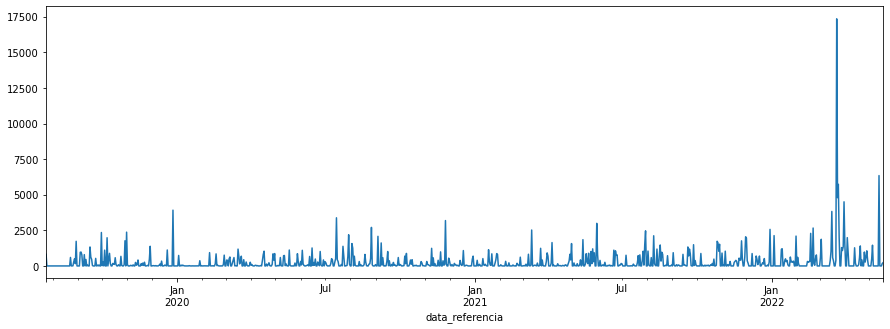

In [57]:
df1.valor_cotacao.plot(figsize=(15, 5))

### Modelo de variáveis exógenas

In [193]:
mod = df[df['mercadoria']=='SOJA'].copy()
mod = mod.groupby(
    by=['data_referencia']).agg(
        {'contratos':'count','quantidade_negociada':'sum',
        'notional_brl':'sum','notional_usd':'sum', 'notional_brl_ipca':'sum',
        'notional_usd_ipca':'sum','valor_cotacao':'mean'}).copy()
mod.head(4)

,contratos,quantidade_negociada,notional_brl,notional_usd,notional_brl_ipca,notional_usd_ipca,valor_cotacao
data_referencia,,,,,,,
2019-07-24,30,6000000,208889015.40,55561500.00,6695442651.51,1780892289.47,9.26
2019-08-23,27,2640969,95203599.55,23305084.22,3106643774.70,760481695.60,8.82
2019-08-26,37,272011,335341045.75,81064869.52,10942707808.81,2645274689.68,229.73
2019-08-27,40,5670000,209008095.23,50294317.50,6820264160.29,1641182992.11,8.87


In [195]:
p = 5

for i in range(p):
    mod[f'x_{i+1}'] = mod.valor_cotacao.shift(i + 1)
mod.dropna(axis=0, inplace=True)
mod.head()

,contratos,quantidade_negociada,notional_brl,notional_usd,notional_brl_ipca,notional_usd_ipca,valor_cotacao,x_1,x_2,x_3,x_4,x_5
data_referencia,,,,,,,,,,,,
2019-08-29,121,4685923,175822732.05,42183956.83,5737373361.52,1376529117.45,9.00,8.93,8.87,229.73,8.82,9.26
2019-08-30,22,1620036,60368098.45,14586951.42,1969906370.53,475995256.86,9.00,9.00,8.93,8.87,229.73,8.82
2019-09-04,54,361120,184208711.73,44657740.00,5972240338.06,1447850938.95,182.84,9.00,9.00,8.93,8.87,229.73
2019-09-05,70,399000,474038753.17,116018197.50,15368835365.78,3761432087.37,207.68,182.84,9.00,9.00,8.93,8.87
2019-09-09,33,13942500,507227438.93,124424137.50,16444847493.81,4033961510.53,8.92,207.68,182.84,9.00,9.00,8.93


In [196]:
X = mod.drop('valor_cotacao', axis=1)
y = mod.valor_cotacao

In [197]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X, y)

DecisionTreeRegressor()

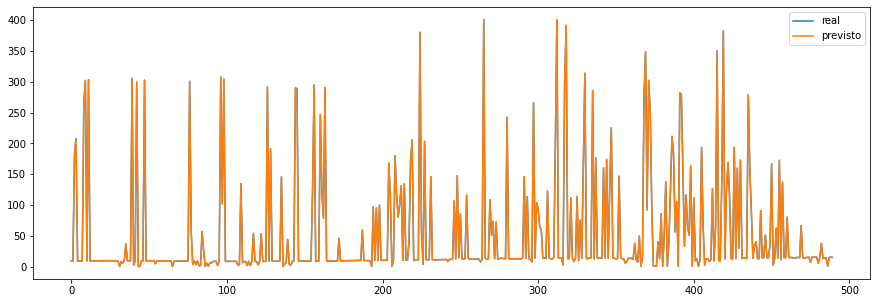

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(mod.valor_cotacao.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

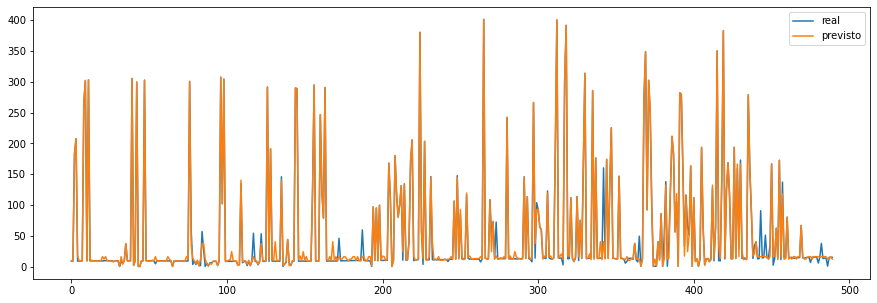

In [199]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(mod.valor_cotacao.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [200]:
mod['month'] = mod.index.month
mod.head()

,contratos,quantidade_negociada,notional_brl,notional_usd,notional_brl_ipca,notional_usd_ipca,valor_cotacao,x_1,x_2,x_3,x_4,x_5,month
data_referencia,,,,,,,,,,,,,
2019-08-29,121,4685923,175822732.05,42183956.83,5737373361.52,1376529117.45,9.00,8.93,8.87,229.73,8.82,9.26,8
2019-08-30,22,1620036,60368098.45,14586951.42,1969906370.53,475995256.86,9.00,9.00,8.93,8.87,229.73,8.82,8
2019-09-04,54,361120,184208711.73,44657740.00,5972240338.06,1447850938.95,182.84,9.00,9.00,8.93,8.87,229.73,9
2019-09-05,70,399000,474038753.17,116018197.50,15368835365.78,3761432087.37,207.68,182.84,9.00,9.00,8.93,8.87,9
2019-09-09,33,13942500,507227438.93,124424137.50,16444847493.81,4033961510.53,8.92,207.68,182.84,9.00,9.00,8.93,9


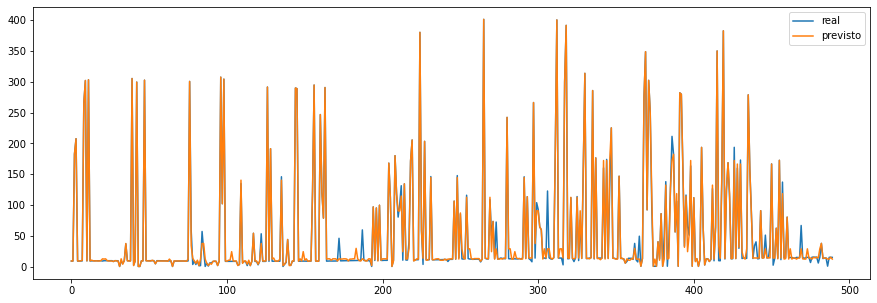

In [201]:
X = mod.drop('valor_cotacao', axis=1)
y = mod.valor_cotacao
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(mod.valor_cotacao.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [202]:
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(X_train, y_train)

((y_test - reg.predict(X_test)) ** 2).mean()

4639.837066185947

In [220]:
p = 3
max_depth = 5

mod = df[df['mercadoria']=='SOJA'].copy()
mod = mod[mod['fator_conversao']>=1].copy()
mod = mod.groupby(
    by=['data_referencia']).agg(
        {'contratos':'count','quantidade_negociada':'sum',
        'notional_brl':'sum','notional_usd':'sum', 'notional_brl_ipca':'sum',
        'notional_usd_ipca':'sum','valor_cotacao':'mean'}).copy()
        
for i in range(p):
    mod[f'x_{i+1}'] = mod.valor_cotacao.shift(i + 1)
mod.dropna(axis=0, inplace=True)
mod['month'] = mod.index.month

X = mod.drop('valor_cotacao', axis=1)
y = mod.valor_cotacao
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

1397.5595065989019

In [221]:
mod.tail()

,contratos,quantidade_negociada,notional_brl,notional_usd,notional_brl_ipca,notional_usd_ipca,valor_cotacao,x_1,x_2,x_3,month
data_referencia,,,,,,,,,,,
2022-03-02,72,98172,203593833.13,39650580.00,26960109691.84,5250571541.05,403.89,421.11,420.36,422.21,3
2022-03-14,18,39600,88918101.67,17556440.00,11774628620.88,2324842265.26,443.34,403.89,421.11,420.36,3
2022-03-17,8,37600,81216308.32,15998800.00,10754749038.59,2118577936.84,425.50,443.34,403.89,421.11,3
2022-03-30,14,85400,174853080.95,36813500.00,23154229035.27,4874882421.05,431.07,425.50,443.34,403.89,3
2022-04-27,8,23200,48319700.56,9631770.00,6668118677.14,1329184260.00,415.16,431.07,425.50,443.34,4


In [222]:
X_new = [[8,	23200,	48319700.56,	9631770.00,	6668118677.14,	1329184260.00]]

In [223]:
periodo_futuro = mod.index[-1] + np.timedelta64(1, 'D')
X_new = [list(np.flip(mod.valor_cotacao.tail(p).values, axis=0)) + [periodo_futuro.month]]
X_new

[[415.1625, 431.0714285714285, 425.5, 4]]

In [224]:
reg.predict(X_new)

ValueError: X has 4 features, but DecisionTreeRegressor is expecting 10 features as input.

#### Tratamento


In [178]:
a = list(df.mercadoria.unique())

In [179]:
a

['OLEO',
 'COBRE',
 'ALUMINIO',
 'CAFE',
 'ENERGIA ELETRICA',
 'SOJA',
 'MILHO',
 'ALGODAO',
 'BOI',
 'ACUCAR',
 'OURO',
 'PETROLEO',
 'NIQUEL',
 'ETANOL',
 'PLATINA',
 'GASOLINA',
 'ZINCO',
 'SUCO DE LARANJA',
 'MINERIO DE FERRO',
 'BORRACHA',
 'PRATA',
 'ESTANHO',
 'ACUCAR BRL D_0',
 'PALADIO',
 'CARVAO',
 'UREIA',
 'CHUMBO',
 'TRIGO',
 'GAS NATURAL',
 'ACO',
 'BOBINA DE ACO LAMINADO',
 'GASOLEO']

In [199]:
df.columns

Index(['anomes', 'mercadoria', 'tipo', 'bolsa', 'unidade_negociacao', 'moeda',
       'quantidade_negociada', 'comprador_vendedor', 'cod_ric', 'cod_ticker',
       'fator_conversao', 'valor_cotacao', 'usd', 'notional_usd',
       'notional_brl', 'mes', 'ano', 'ipca', 'ipca_acumulado',
       'notionalusd_ipca', 'notionalbrl_ipca', 'notionalusd_norm',
       'notionalbrl_norm', 'notionalusd_normipca', 'notionalbrl_normipca',
       'contratos', 'notional_ipca'],
      dtype='object')

In [250]:
from bcb import sgs
ipca = sgs.get({'IPCA':433}, start='2018-01-01', end='2022-07-01')
selic = sgs.get({'SELIC':432}, start='2019-01-01', end='2022-07-01')
igpm = sgs.get({'igp-m':189}, start='2019-01-01', end='2022-07-01')

In [262]:
taxas = pd.DataFrame()

taxas['igpm']=igpm['igp-m']
taxas['igpm_acumulado']=igpm['igp-m'].cumsum()
taxas['selic']=selic['SELIC']
taxas['ipca']=ipca['IPCA']
taxas['ipca_acumulado']=ipca['IPCA'].cumsum()
#taxas['ipca_acumulado']=12
#taxas['ipca_acumulado'][1:]=taxas['ipca_acumulado'][0]+taxas['ipca'
taxas['juros_real']=selic['SELIC']-ipca['IPCA']
taxas.head(2)

In [239]:
b = df
b.reset_index(inplace=True)
b = df.groupby(by=['mercadoria','data_referencia']).agg({'valor_cotacao':'mean'})
b.reset_index(inplace=True)
b.head(2)

,mercadoria,data_referencia,valor_cotacao
0,ACO,2021-11-11,730.0000
1,ACUCAR,2019-08-23,0.1318


In [242]:
mcor = b.pivot(index=['data_referencia'],columns=['mercadoria'], values='valor_cotacao')

In [245]:
mcor.head()

mercadoria,ACO,ACUCAR,ACUCAR BRL D_0,ALGODAO,ALUMINIO,BOBINA DE ACO LAMINADO,BOI,BORRACHA,CAFE,CARVAO,CHUMBO,COBRE,ENERGIA ELETRICA,ESTANHO,ETANOL,GAS NATURAL,GASOLEO,GASOLINA,MILHO,MINERIO DE FERRO,NIQUEL,OLEO,OURO,PALADIO,PETROLEO,PLATINA,PRATA,SOJA,SUCO DE LARANJA,TRIGO,UREIA,ZINCO
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,NaN,NaN,NaN,NaN,1349.166667,NaN,NaN,NaN,1.102206,NaN,NaN,5761.0,224.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899000,NaN,NaN,NaN,NaN,NaN,9.260250,NaN,NaN,NaN,NaN
2019-08-23,NaN,0.131800,NaN,0.606967,1312.333333,NaN,161.011111,NaN,1.068979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.849286,NaN,NaN,1.808427,1530.875,NaN,NaN,NaN,NaN,8.824444,NaN,NaN,NaN,NaN
2019-08-26,NaN,0.131362,NaN,NaN,NaN,NaN,NaN,NaN,1.112133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.720000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.734527,NaN,NaN,NaN,NaN
2019-08-27,NaN,NaN,NaN,NaN,1301.333333,NaN,NaN,NaN,1.105883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.866563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.870250,NaN,NaN,NaN,NaN
2019-08-28,NaN,0.130838,NaN,NaN,1291.666667,NaN,NaN,NaN,1.110217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.987143,NaN,NaN,NaN,NaN,NaN,57.445135,NaN,NaN,8.926750,NaN,NaN,NaN,NaN


In [243]:
corr = mcor.corr()

In [244]:
corr

mercadoria,ACO,ACUCAR,ACUCAR BRL D_0,ALGODAO,ALUMINIO,BOBINA DE ACO LAMINADO,BOI,BORRACHA,CAFE,CARVAO,CHUMBO,COBRE,ENERGIA ELETRICA,ESTANHO,ETANOL,GAS NATURAL,GASOLEO,GASOLINA,MILHO,MINERIO DE FERRO,NIQUEL,OLEO,OURO,PALADIO,PETROLEO,PLATINA,PRATA,SOJA,SUCO DE LARANJA,TRIGO,UREIA,ZINCO
mercadoria,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUCAR,NaN,1.000000,NaN,0.941609,0.940397,NaN,0.790151,0.805236,0.066122,0.976468,0.932254,0.869844,-0.483213,0.994669,0.970386,NaN,-0.459885,0.934663,0.563818,0.223557,0.688899,0.892917,0.064295,-0.798572,0.908182,0.402895,NaN,0.093230,1.000000,-0.742979,0.999908,0.892183
ACUCAR BRL D_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALGODAO,NaN,0.941609,NaN,1.000000,0.955107,NaN,0.853203,NaN,0.286305,0.321784,1.000000,0.760866,NaN,0.821534,0.983033,NaN,1.000000,0.952303,0.661845,-0.357110,0.634847,0.917343,0.281979,-0.893740,0.942698,-0.813132,NaN,-0.006384,NaN,-1.000000,NaN,0.794189
ALUMINIO,NaN,0.940397,NaN,0.955107,1.000000,NaN,0.902800,0.986795,0.066936,0.931480,1.000000,0.931828,-0.776642,0.996142,0.950741,NaN,0.292799,0.905009,0.653646,0.226562,0.689010,0.846888,0.432319,-0.809325,0.912452,0.541994,NaN,0.024612,NaN,0.743347,1.000000,0.901471
BOBINA DE ACO LAMINADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOI,NaN,0.790151,NaN,0.853203,0.902800,NaN,1.000000,0.513874,0.056521,0.247842,1.000000,0.946581,-0.919293,0.977655,0.822828,NaN,-0.250542,0.766679,0.710531,0.601546,0.530915,0.619956,0.427979,0.984622,0.790737,0.855037,-0.071116,0.146782,0.994701,0.319625,1.000000,0.830047
BORRACHA,NaN,0.805236,NaN,NaN,0.986795,NaN,0.513874,1.000000,0.642792,NaN,NaN,0.999826,NaN,NaN,1.000000,NaN,NaN,0.795460,-0.174176,0.901834,NaN,0.938137,-0.836376,NaN,0.562153,NaN,NaN,0.739403,NaN,NaN,NaN,NaN
CAFE,NaN,0.066122,NaN,0.286305,0.066936,NaN,0.056521,0.642792,1.000000,-0.085620,0.967045,-0.067685,-0.850939,0.987328,-0.056905,NaN,-0.275420,-0.039278,0.059240,-0.227403,-0.039895,0.013189,-0.025668,-0.724273,-0.036480,0.163391,NaN,0.016597,NaN,0.202995,0.988908,0.442381


In [ ]:
#filtro por mercadoria 
#correlação
#selic
#juros real

#### Feature Importance

In [238]:
df.head(2)

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,0,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOH0,HOH0,100.0000%,191.5200%,375.9600%,659594880.0000%,2479812910.8480%,7,2019,20197,32.0000%,401.0000%,650.0000%,1.0000%,1.0000%,618.0000%,1,31075155539.0640%,8265548340.0000%,32.8900%
2019-07-24,1,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOX0,HOX0,100.0000%,186.3600%,375.9600%,641823840.0000%,2413000908.8640%,7,2019,20197,43.0000%,444.0000%,650.0000%,88.0000%,89.0000%,607.0000%,1,33480387610.4880%,8905305780.0000%,31.2819%


In [242]:
mod = df[df['mercadoria']=='SOJA'].copy()
mod = mod[mod['fator_conversao']>=1].copy()
mod = mod.groupby(
    by=['data_referencia']).agg(
        {'contratos':'count','quantidade_negociada':'sum', 'juros_real':'mean',
        'selic':'mean','usd':'mean','ipca':'mean','igpm':'mean','notional_brl':'sum',
        'valor_cotacao':'mean'}).copy()
mod.head(2)

,contratos,quantidade_negociada,juros_real,selic,usd,ipca,igpm,notional_brl,valor_cotacao
data_referencia,,,,,,,,,
2019-08-26,28,269500,NaN,NaN,4.1367,NaN,NaN,335248509.7500,300.7143
2019-09-04,32,141120,NaN,NaN,4.1249,NaN,NaN,175977886.2660,302.3125


In [246]:
mod = df[df['mercadoria']=='SOJA'].copy()
#mod = mod[mod['fator_conversao']>=1].copy()
mod.head(2)

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,228,SOJA,EM GRAOS,CBOT,BUSHELS,(220) USD,200000,Cliente x Mercado,SC1,S 1,0.0100,8.9425,3.7596,1788500.0000,6724044.6000,7,2019,20197,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,-0.1061
2019-07-24,229,SOJA,EM GRAOS,CBOT,BUSHELS,(220) USD,200000,Cliente x Mercado,SN0,S N0,0.0100,9.3650,3.7596,1873000.0000,7041730.8000,7,2019,20197,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,-0.0985


In [253]:
df.tail()

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-18,242573,PETROLEO,PRIMEIRO FUTURO OLEO CRU-BRENT,ICE (NYBOT),BARRIL,(220) USD,31000,Mercado x Cliente,LCOV2,COV2,1.0000,102.3300,4.9592,3172230.0000,15731723.0160,5,2022,20225,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.1107
2022-05-18,242574,PETROLEO,PRIMEIRO FUTURO OLEO CRU-BRENT,ICE (NYBOT),BARRIL,(220) USD,31000,Mercado x Cliente,LCOV3,COV3,1.0000,88.9900,4.9592,2758690.0000,13680895.4480,5,2022,20225,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0613
2022-05-18,242575,PETROLEO,PRIMEIRO FUTURO OLEO CRU-BRENT,ICE (NYBOT),BARRIL,(220) USD,31000,Mercado x Cliente,LCOX2,COX2,1.0000,100.4600,4.9592,3114260.0000,15444238.1920,5,2022,20225,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.1038
2022-05-18,242576,PETROLEO,PRIMEIRO FUTURO OLEO CRU-BRENT,ICE (NYBOT),BARRIL,(220) USD,31000,Mercado x Cliente,LCOX3,COX3,1.0000,88.3200,4.9592,2737920.0000,13577892.8640,5,2022,20225,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0588
2022-05-18,242577,PETROLEO,PRIMEIRO FUTURO OLEO CRU-BRENT,ICE (NYBOT),BARRIL,(220) USD,31000,Mercado x Cliente,LCOZ2,COZ2,1.0000,98.7600,4.9592,3061560.0000,15182888.3520,5,2022,20225,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0975


In [248]:
df.head(2)

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,0,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOH0,HOH0,1.0000,1.9152,3.7596,6595948.8000,24798129.1085,7,2019,20197,0.3200,4.0100,6.5000,0.0100,0.0100,6.1800,1,310751555.3906,82655483.4000,0.3289
2019-07-24,1,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOX0,HOX0,1.0000,1.8636,3.7596,6418238.4000,24130009.0886,7,2019,20197,0.4300,4.4400,6.5000,0.8800,0.8900,6.0700,1,334803876.1049,89053057.8000,0.3128


In [243]:
df.head(2)

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,0,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOH0,HOH0,1.0000,1.9152,3.7596,6595948.8000,24798129.1085,7,2019,20197,0.3200,4.0100,6.5000,0.0100,0.0100,6.1800,1,310751555.3906,82655483.4000,0.3289
2019-07-24,1,OLEO,NY HARBOR ULSD FUTURES (HO),NYMEX,GALAO,(220) USD,3444000,Mercado x Cliente,HOX0,HOX0,1.0000,1.8636,3.7596,6418238.4000,24130009.0886,7,2019,20197,0.4300,4.4400,6.5000,0.8800,0.8900,6.0700,1,334803876.1049,89053057.8000,0.3128


In [228]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split

In [254]:
mod.head(2)

,index,mercadoria,tipo,bolsa,unidade_negociacao,moeda,quantidade_negociada,comprador_vendedor,cod_ric,cod_ticker,fator_conversao,valor_cotacao,usd,notional_usd,notional_brl,mes,ano,anomes,ipca,ipca_acumulado,selic,igpm,igpm_acumulado,juros_real,contratos,notional_brl_ipca,notional_usd_ipca,notionalbrl_norm
data_referencia,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-24,228,SOJA,EM GRAOS,CBOT,BUSHELS,(220) USD,200000,Cliente x Mercado,SC1,S 1,0.0100,8.9425,3.7596,1788500.0000,6724044.6000,7,2019,20197,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,-0.1061
2019-07-24,229,SOJA,EM GRAOS,CBOT,BUSHELS,(220) USD,200000,Cliente x Mercado,SN0,S N0,0.0100,9.3650,3.7596,1873000.0000,7041730.8000,7,2019,20197,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,-0.0985


In [255]:
mod = df[df['mercadoria']=='SOJA'].copy()
mod = mod[mod['fator_conversao']>=1].copy()
mod = mod.groupby(
    by=['data_referencia']).agg(
        {'contratos':'count','quantidade_negociada':'sum', 'juros_real':'mean',
        'selic':'mean','usd':'mean','ipca':'mean','igpm':'mean','notional_brl':'sum',
        'valor_cotacao':'mean'}).copy()
mod.head(2)

,contratos,quantidade_negociada,juros_real,selic,usd,ipca,igpm,notional_brl,valor_cotacao
data_referencia,,,,,,,,,
2019-08-26,28,269500,NaN,NaN,4.1367,NaN,NaN,335248509.7500,300.7143
2019-09-04,32,141120,NaN,NaN,4.1249,NaN,NaN,175977886.2660,302.3125


In [256]:
X = mod.drop(['juros_real','selic','ipca','igpm','valor_cotacao'], axis=1)
y = mod['valor_cotacao']

In [257]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=0.5)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((71, 4), (71, 4), (71,), (71,))

In [263]:
from xml.etree.ElementPath import prepare_predicate
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

k_vs_score = []
for k in range(1,5):
#k = 8
    selector = SelectKBest(score_func=f_regression, k=k)

    Xtrain2 = selector.fit_transform(Xtrain, ytrain)
    Xval2 = selector.transform(Xval)

    md1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    md1.fit(Xtrain2, ytrain)

    p = md1.predict(Xval2)

    score = mean_absolute_error(yval, p)

    print('k={} - MAE={}'.format(k, score))

    k_vs_score.append(score)

k=1 - MAE=36.06326579730905
k=2 - MAE=31.164566619413428
k=3 - MAE=27.310281103286382
k=4 - MAE=26.812261180212587


<AxesSubplot:>

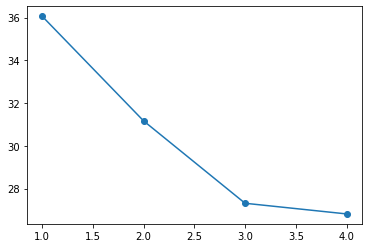

In [264]:
pd.Series(k_vs_score, index=range(1,5)).plot(marker='o')

In [265]:
mask = selector.get_support()
Xval.iloc[:,mask]

,contratos,quantidade_negociada,usd,notional_brl
data_referencia,,,,
2021-11-22,16,42400,5.5841,85957838.2120
2020-08-07,30,80000,5.4227,125177606.8000
2020-03-11,12,132240,4.6738,187407097.2536
2021-12-29,21,12600,5.6619,28619545.6440
2021-10-14,64,264496,5.4988,465484114.0662
...,...,...,...,...
2021-07-20,32,176352,5.2465,338900464.9338
2020-12-29,32,352720,5.1942,734442375.5460
2021-04-27,16,176352,5.4424,396520335.0346


<AxesSubplot:>

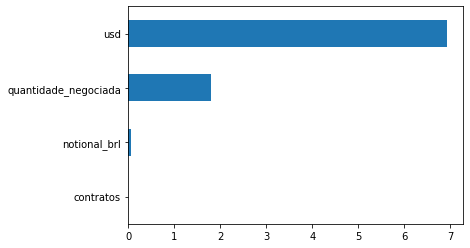

In [266]:
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail().plot.barh()

##### Séries temporais

In [267]:
#sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline 

In [94]:
df3 = prep('OLEO','1M','sim','Mercado x Cliente')
df3.head(4)

,valor_cotacao,usd
data_referencia,,
2019-07-31,816.332978,3.759600
2019-08-31,545.667651,4.139983
2019-09-30,631.265244,4.112707
2019-10-31,551.765183,4.091160


In [269]:
sarimax_model = SARIMAX(mod.valor_cotacao, order=(2,1,2), seasonal_order=(3,1,2,12), exog=mod['usd']).fit()

c:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [270]:
(sarimax_model.resid ** 2).mean()

1311.8689649282862

Text(0.5, 1.0, 'Predição Sarimax (exog: USD)')

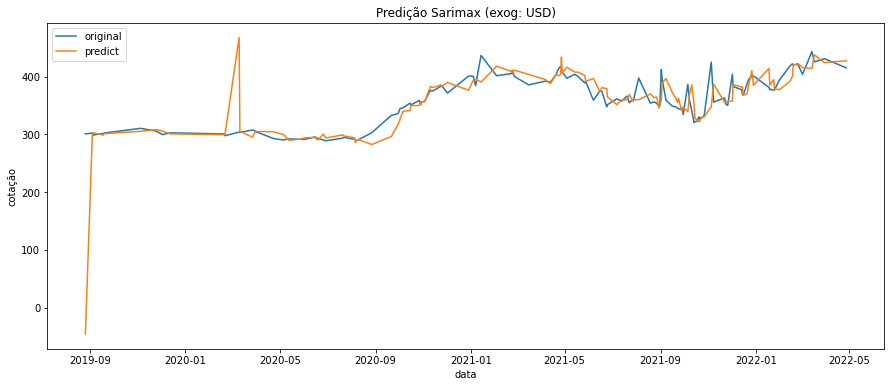

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(mod.valor_cotacao)
plt.xlabel('data')
plt.ylabel('cotação')
plt.plot(sarimax_model.predict(typ='levels'))
plt.legend(['original', 'predict'])
plt.title('Predição Sarimax (exog: USD)')

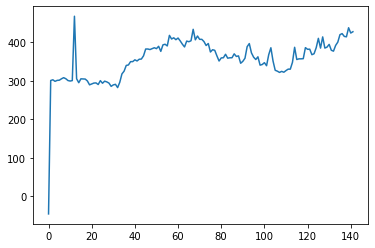

In [278]:
plt.plot(sarimax_model.forecasts[0])

In [84]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:              quantidade_negociada   No. Observations:               287743
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood            -4762638.284
Date:                           Mon, 03 Oct 2022   AIC                        9525288.569
Time:                                   19:18:32   BIC                        9525351.988
Sample:                                        0   HQIC                       9525306.945
                                        - 287743                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
usd         8.978e+06   1.61e-08   5.59e+14      0.000    8.98e+06    8.98e+06
ar.L1         -0.7176      1.181     -0.608      0.543      -3.033       1.597
ma.L1          0.7167      1.197      0.599      0.549      -1.629       3.062
ar.S.L4       -0.0005      0.021     -0.026      0.979      -0.041       0.040
ma.S.L4       -0.9999   3.67e-05  -2.72e+04      0.000      -1.000      -1.000
sigma2      2.299e+13   1.63e-10   1.41e+23      0.000     2.3e+13     2.3e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):      833970908217.75
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               3.60   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                      8343.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.58e+37. Standard errors may be unstable.
"""

In [125]:
df4 = prep('OLEO','1M','sim','Mercado x Cliente')
df4.head(2)

,valor_cotacao,usd
data_referencia,,
2019-07-31,816.332978,3.759600
2019-08-31,545.667651,4.139983


In [282]:
mod.head(2)

,contratos,quantidade_negociada,juros_real,selic,usd,ipca,igpm,notional_brl,valor_cotacao
data_referencia,,,,,,,,,
2019-08-26,28,269500,NaN,NaN,4.1367,NaN,NaN,335248509.7500,300.7143
2019-09-04,32,141120,NaN,NaN,4.1249,NaN,NaN,175977886.2660,302.3125


In [281]:
#arima
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(mod.valor_cotacao, freq='1M', order=(1,1,1)).fit();
(arima.resid ** 2).mean()

ValueError: The given frequency argument could not be matched to the given index.

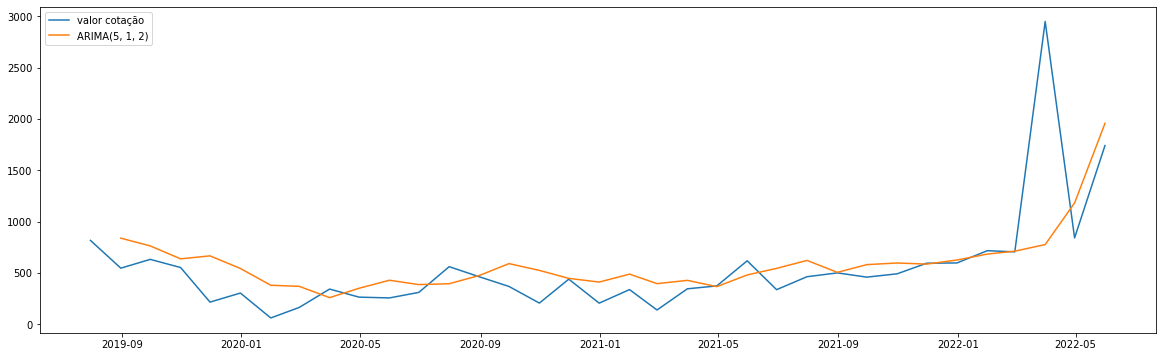

In [133]:
plt.figure(figsize=(20, 6))
plt.plot(df4.valor_cotacao)
plt.plot(arima.predict(typ='levels'))
plt.legend(['valor cotação', 'ARIMA(5, 1, 2)'])

In [132]:
orders = [(2, 1, 1), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
best = 10000
for order in orders:
    try:
        arima = ARIMA(df4.valor_cotacao, freq='1M', order=order).fit()
        erro = (arima.resid ** 2).mean()
        if erro < best:
            print(f'ARIMA{order}, erro={erro}')
            best = erro
    except:
        pass

c:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Rodrigo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode